In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Remove later
import os
# os.chdir("C:/Users/Joanne/Documents/Statistics/")
# os.chdir("C:/Users/qi750922/Documents/")
os.chdir("/Users/Qidi/Desktop")

# Read in the Data

In [3]:
df_tic = pd.read_table("2023-08-18-IS-tic.csv",sep=',',header=None)
df_tic.head()

,0,1,2,3,4,5,6,7,8,9,...,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_labels = pd.read_table("2023-08-18-MixDat.csv",sep=',')

#Double check this if correct. Only look at class column
df_labels = df_labels["class"]
df_labels.head()

0    IL
1    IL
2    IL
3    IL
4    IL
Name: class, dtype: object

# Split into train and test groups

In [5]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
feat_train, feat_test, resp_train, resp_test = train_test_split(df_tic, df_labels, test_size=0.25)
print(feat_train.head())

       0     1     2     3     4     5     6     7     8     9     ...  2790   
25772     0     0     0     0     0     0     0     0     0     0  ...     0  \
45791     0     0     0     0     0     0     0     0     0     0  ...     0   
25396     0     0     0     0     0     0     0     0     0     0  ...     0   
43835     0     0     0     0     0     0     0     0     0     0  ...     0   
15782     0     0     0     0     0     0     0     0     0     0  ...     0   

       2791  2792  2793  2794  2795  2796  2797  2798  2799  
25772     0     0     0     0     0     0     0     0     0  
45791     0     0     0     0     0     0     0     0     0  
25396     0     0     0     0     0     0     0     0     0  
43835     0     0     0     0     0     0     0     0     0  
15782     0     0     0     0     0     0     0     0     0  

[5 rows x 2800 columns]


# Scale and Center Columns with Mean and Standard Deviation

In [6]:
# Code from knn_svm_python.ipynb
np.random.seed(1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# get mean and standard deviation for each column according to train data
scaler.fit(feat_train)
# scale columns of train and test data
feat_train = scaler.transform(feat_train)
feat_test = scaler.transform(feat_test)

pd.DataFrame(feat_train).head()

,0,1,2,3,4,5,6,7,8,9,...,2790,2791,2792,2793,2794,2795,2796,2797,2798,2799
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Machine Learning Models:

In [8]:
# Function to convert to a numerical representation:
def convertPred(alphaversion):
    np.random.seed(1)
    yhat_numRep = []

    for i in range(len(alphaversion)):
        if (alphaversion[i] == "IL"):
            yhat_numRep.append(1)
        elif (alphaversion[i] == "SUB"):
            yhat_numRep.append(0)
    return yhat_numRep

def convertTrue(alphaversion):
    np.random.seed(1)
    resp_test_numRep = []

    for val in alphaversion:
        if (val == "IL"):
            resp_test_numRep.append(1)
        elif (val == "SUB"):
            resp_test_numRep.append(0)
    return resp_test_numRep

def findMSE(pred_alpha,true_alpha,model):
    from sklearn.metrics import mean_squared_error
    pred_numeric = convertPred(pred_alpha)
    true_numeric = convertTrue(true_alpha)
    error = mean_squared_error(pred_numeric,true_numeric,squared=False)
    print(f"{error} is the MSE of {model}")
    return pred_numeric, true_numeric

In [9]:
# Create a function to generate ROC and AUC of any model

# Check order: real and then pred?
def makeROC(pred_numeric, true_numeric, model):
    np.random.seed(1)
    from sklearn.metrics import roc_curve, auc

    # metrics for logistic regression
    fpr_log, tpr_log, _ = roc_curve(true_numeric, pred_numeric)
    auc_log = auc(fpr_log, tpr_log)

    # plot the info
    plt.plot(fpr_log, tpr_log, label='AUC: {0:0.2f}'.format(auc_log))

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {model}')
    plt.legend(loc='lower right')

# Logistic Regression: 

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
np.random.seed(1)
logReg = LogisticRegression(max_iter=1500).fit(feat_train, resp_train)
logReg_yhat = logReg.predict(feat_test)

In [11]:
# print(logReg_yhat)
# print(resp_test)
np.random.seed(1)

# Here i made numerical representations for the sake of calculating MSE
logReg_yhat_numRep = []
resp_test_numRep = []

for i in range(len(logReg_yhat)):
    if (logReg_yhat[i] == "IL"):
        logReg_yhat_numRep.append(1)
    elif (logReg_yhat[i] == "SUB"):
        logReg_yhat_numRep.append(0)

for val in resp_test:
    if (val == "IL"):
        resp_test_numRep.append(1)
    elif (val == "SUB"):
        resp_test_numRep.append(0)

# print(logReg_yhat_numRep)
# print(resp_test_numRep)

error = mean_squared_error(logReg_yhat_numRep,resp_test_numRep,squared=False)
print(f"{error} is the MSE of logistic regression")

0.07211102550927978 is the MSE of logistic regression


In [17]:
logReg_yhat_numRep, resp_test_numRep = findMSE(logReg_yhat,resp_test,"logistic regression")

0.07211102550927978 is the MSE of logistic regression


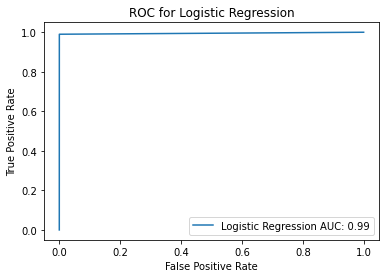

In [18]:
# Code adapted from knn_svm_python.ipynb
# Create an ROC curve for Logistic Regression
np.random.seed(1)
from sklearn.metrics import roc_curve, auc

# metrics for logistic regression
fpr_log, tpr_log, _ = roc_curve(resp_test_numRep, logReg_yhat_numRep)
auc_log = auc(fpr_log, tpr_log)

# plot the info
plt.plot(fpr_log, tpr_log, label='Logistic Regression AUC: {0:0.2f}'.format(auc_log))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend(loc='lower right')

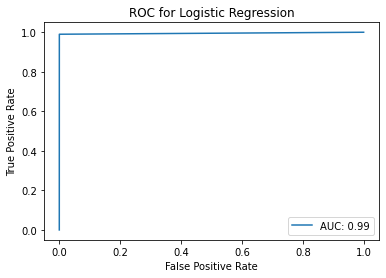

In [19]:
makeROC(logReg_yhat_numRep,resp_test_numRep, "Logistic Regression")

# Linear Discriminant Analysis:

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
np.random.seed(1)
lda = LinearDiscriminantAnalysis().fit(feat_train, resp_train)
lda_yhat = lda.predict(feat_test)
print(lda_yhat)

['SUB' 'SUB' 'SUB' ... 'SUB' 'IL' 'SUB']


In [66]:
lda_yhat_numeric,resp_test_numeric = findMSE(lda_yhat,resp_test,"LDA")

0.288859827598093 is the MSE of LDA


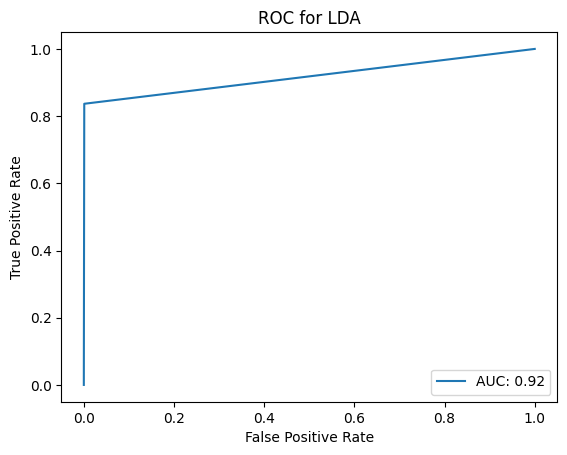

In [67]:
makeROC(lda_yhat_numeric,resp_test_numeric,"LDA")

# KNN Classifier:

Need to choose the number of neighbors k

Scikit learn has a built in function, GridSearchCV, that performs cross-validation in order to find the best hyperparameter from a specified list of hyperparameter options. It exhaustively tries each listed value of the specified hyperparameter. If there are multiple hyperparameters, it will try every possible combination of the values specified. It will then select the hyperparameter(s) with the best score. By default, it performs 5-fold cross-validation.

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV)

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(1)

# I decided to explore this range of potential k values, from 1 at minimum to 100 maximum.
knn_params = {'n_neighbors' : [1, 3, 5, 10, 15, 20, 25, 50, 75, 100]}

knn_clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=knn_params)
knn_clf.fit(feat_train,resp_train)

# Here I output the best parameter, best estimator with that parameter, and best score
print(knn_clf.best_params_)
print(knn_clf.best_estimator_)
# This is the mean cross-validated score of the best estimator
print(knn_clf.best_score_)


{'n_neighbors': 1}
KNeighborsClassifier(n_neighbors=1)
0.8391466666666666


In [69]:
knn_yhat = knn_clf.predict(feat_test)
print(knn_yhat)

['SUB' 'SUB' 'SUB' ... 'SUB' 'IL' 'SUB']


In [70]:
knn_yhat_numeric,resp_test_numeric = findMSE(knn_yhat,resp_test,"kNN")

0.4043760625952036 is the MSE of kNN


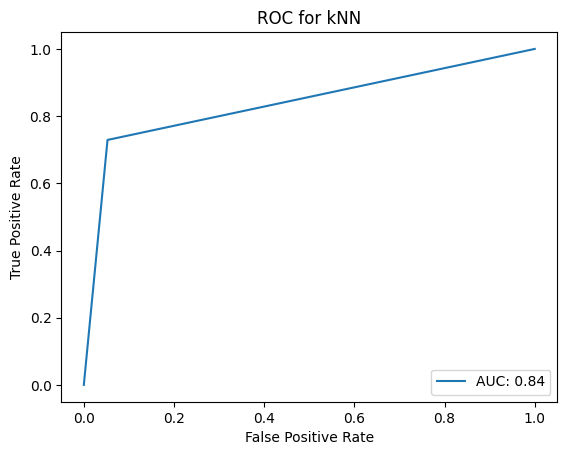

In [71]:
makeROC(knn_yhat_numeric,resp_test_numeric,"kNN")

# Linear Support Vector Machine:

In [72]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
np.random.seed(1)

# Since linear is the only option for kernel, this will make a linear SVM.
# C's value ranges from 1 to 10. I conducted this experiment with C from 1 to 100, 
# and it chose 1 as the best after 30 min. So in the interest of time, I am just using 1 and 10.
# C is the margin penalty and specifies how wide the margin can be, 
# and thus how many mistakes can be made.
# Large values of C = smaller margin
# Small values of C = larger margin
linSVM_params = {'kernel' : ['linear'], 'C' : [1, 10]}

linSVM_clf = GridSearchCV(estimator=SVC(), param_grid=linSVM_params)
linSVM_clf.fit(feat_train,resp_train)

# Here I output the best parameter, best estimator with that parameter, and best score
print(linSVM_clf.best_params_)
print(linSVM_clf.best_estimator_)
# This is the best mean cross-validated score of the best estimator
print(linSVM_clf.best_score_)


{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')
0.9960266666666666


In [73]:
linSVM_yhat = linSVM_clf.predict(feat_test)
print(linSVM_yhat)

['SUB' 'SUB' 'SUB' ... 'SUB' 'IL' 'SUB']


In [74]:
linSVM_yhat_numeric,resp_test_numeric = findMSE(linSVM_yhat,resp_test,"linear SVM")

0.052153619241621194 is the MSE of linear SVM


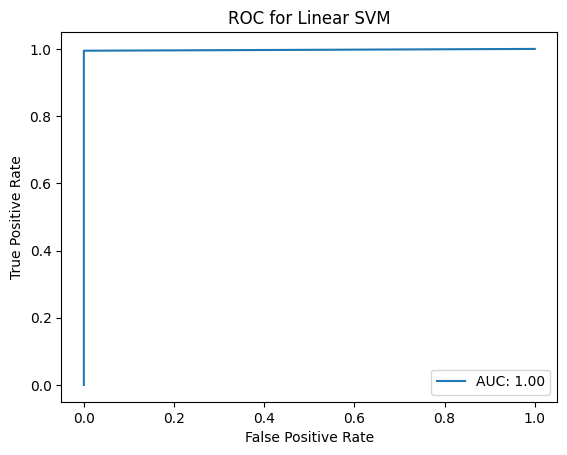

In [75]:
makeROC(linSVM_yhat_numeric,resp_test_numeric,"Linear SVM")

# Gaussian (Radial) Support Vector Machine

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
np.random.seed(1)

# Since rbf is the only option for kernel, this will make a Gaussian (radial) SVM.
# rbf stands for radial basis function kernel and is the same as a Gaussian (radial) kernel
# C's value ranges from 1 to 100. 
# gamma's values range from 0.1 to 100
gaussSVM_params = {'kernel' : ['rbf'], 'C' : [1], 'gamma' : [0.1]}

gaussSVM_clf = GridSearchCV(estimator=SVC(), param_grid=gaussSVM_params)
gaussSVM_clf.fit(feat_train,resp_train)

# Here I output the best parameter, best estimator with that parameter, and best score
print(gaussSVM_clf.best_params_)
print(gaussSVM_clf.best_estimator_)
# This is the best mean cross-validated score of the best estimator
print(gaussSVM_clf.best_score_)

In [12]:
# I have permission from Dr. Tang to use default parameters for Gaussian SVM
from sklearn.svm import SVC
np.random.seed(1)

gaussSVM_clf_standard = SVC(kernel='rbf').fit(feat_train, resp_train)
gaussSVM_clf_standard_yhat = gaussSVM_clf_standard.predict(feat_test)

In [14]:
gaussSVM_yhat = gaussSVM_clf_standard.predict(feat_test)
print(gaussSVM_yhat)

['SUB' 'SUB' 'SUB' ... 'SUB' 'IL' 'SUB']


In [15]:
gaussSVM_yhat_numeric,resp_test_numeric = findMSE(gaussSVM_yhat,resp_test,"Gaussian (radial) SVM")

0.2316894473211933 is the MSE of Gaussian (radial) SVM


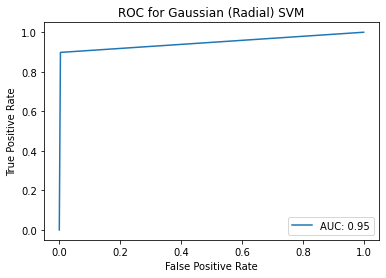

In [16]:
makeROC(gaussSVM_yhat_numeric,resp_test_numeric,"Gaussian (Radial) SVM")

# MAGIC Dataset

# Read in Data

In [3]:
magic = pd.read_table("magic04.data",sep=',',header=None)
magic = magic.rename(columns={0: 'fLength', 1:'fWidth',2:'fSize',3:'fConc',4:'fConc1',5:'fAsym',6:'fM3Long',7:'fM3Trans',8:'fAlpha',9:'fDist',10:'class'})
magic.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [4]:
# Convert class column to categorical
magic["class"] = magic["class"].astype('category')
magic.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [5]:
# Separate features/predictors from response
magic_feats = magic.drop(columns=['class'])
magic_resp = np.array(magic['class'])

print(magic_feats[:5])
print(magic_resp)
magic_cols = magic_feats.columns
print(magic_cols)

    fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist  
0  40.0920   81.8828  
1   6.3609  205.2610  
2  76.9600  256.7880  
3  10.4490  116.7370  
4   4.6480  356.4620  
['g' 'g' 'g' ... 'h' 'h' 'h']
Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist'],
      dtype='object')


# Split into Training and Testing Sets

In [6]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
m_feat_train, m_feat_test, m_resp_train, m_resp_test = train_test_split(magic_feats, magic_resp, test_size=0.25)
print(m_feat_train.head())

        fLength   fWidth   fSize   fConc  fConc1    fAsym   fM3Long  fM3Trans  \
9667   103.8240  34.1769  3.1958  0.1644  0.0876  15.2711   95.6895   14.6144   
18049   35.1524  27.2944  2.6748  0.2895  0.1301  -1.0007  -19.9024  -15.4176   
11947   62.0676  16.9250  3.1730  0.2189  0.1306  60.4294   42.5727   13.3678   
9251    13.0301  11.1805  2.1351  0.7546  0.3773  14.9999    0.4644  -11.8252   
13458  144.6510  40.3478  2.9380  0.6182  0.4988 -74.6539 -155.4890  -42.0003   

        fAlpha     fDist  
9667   35.2160  164.4260  
18049  54.3607  170.7192  
11947   0.0260  197.9060  
9251   35.0960  146.6610  
13458  38.0104  280.0510  


# Scale and Center Columns with Mean and Standard Deviation

In [7]:
# Code from knn_svm_python.ipynb
np.random.seed(1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# get mean and standard deviation for each column according to train data
scaler.fit(m_feat_train)
# scale columns of train and test data
m_feat_train = scaler.transform(m_feat_train)
m_feat_test = scaler.transform(m_feat_test)

# Machine Learning Models

In [8]:
# Create a function for converting Magic data into numeric and a function for calculating MSE

def convertMagic(alphaversion):
    numeric = []

    for val in alphaversion:
        if (val == "g"):
            numeric.append(1)
        elif (val == "h"):
            numeric.append(0)
    return numeric

def findMagicMSE(pred_alpha,true_alpha,model):
    pred_numeric = convertMagic(pred_alpha)
    true_numeric = convertMagic(true_alpha)
    # print(pred_numeric)
    # print(true_numeric)
    error = mean_squared_error(pred_numeric,true_numeric,squared=False)
    print(f"{error} is the MSE of {model}")
    return pred_numeric, true_numeric

In [16]:
# Create a function to generate ROC and AUC of any model

# Check order: real and then pred?
def makeROC(pred_numeric, true_numeric, model):
    np.random.seed(1)
    from sklearn.metrics import roc_curve, auc

    # metrics for logistic regression
    fpr_log, tpr_log, _ = roc_curve(true_numeric, pred_numeric)
    auc_log = auc(fpr_log, tpr_log)

    # plot the info
    plt.plot(fpr_log, tpr_log, label='AUC: {0:0.2f}'.format(auc_log))

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC for {model}')
    plt.legend(loc='lower right')

# Logistic Regression:

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
np.random.seed(1)
m_logReg = LogisticRegression(max_iter=1500).fit(m_feat_train, m_resp_train)
m_logReg_yhat = m_logReg.predict(m_feat_test)

In [10]:
# print(m_logReg_yhat)
# print(m_resp_test)

np.random.seed(1)
# # Here i made numerical representations for the sake of calculating MSE
m_logReg_yhat_numRep = []
m_resp_test_numRep = []

for val in m_logReg_yhat:
    if (val == "g"):
        m_logReg_yhat_numRep.append(1)
    elif (val == "h"):
        m_logReg_yhat_numRep.append(0)

for val in m_resp_test:
    if (val == "g"):
        m_resp_test_numRep.append(1)
    elif (val == "h"):
        m_resp_test_numRep.append(0)

print(m_logReg_yhat_numRep)
print(m_resp_test_numRep)

error = mean_squared_error(m_logReg_yhat_numRep,m_resp_test_numRep,squared=False)
print(f"{error} is the MSE of logistic regression")

[1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 

In [11]:
m_logReg_yhat_numRep, m_resp_test_numRep = findMagicMSE(m_logReg_yhat,m_resp_test,"logistic regression")

0.4647399010248923 is the MSE of logistic regression


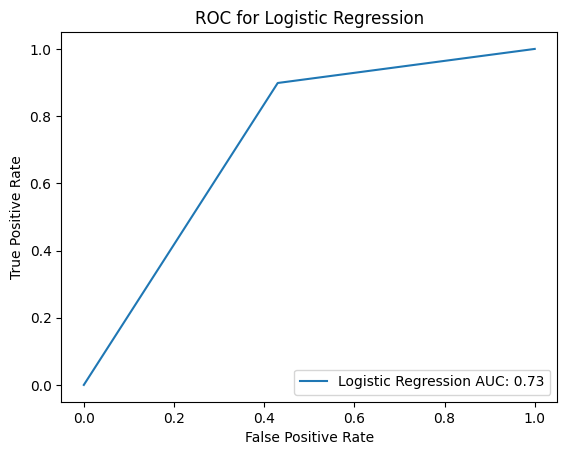

In [13]:
# Code adapted from knn_svm_python.ipynb
# Create an ROC curve for Logistic Regression
np.random.seed(1)
from sklearn.metrics import roc_curve, auc

# metrics for logistic regression
m_fpr_log, m_tpr_log, _ = roc_curve(m_resp_test_numRep, m_logReg_yhat_numRep)
m_auc_log = auc(m_fpr_log, m_tpr_log)

# plot the info
plt.plot(m_fpr_log, m_tpr_log, label='Logistic Regression AUC: {0:0.2f}'.format(m_auc_log))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression')
plt.legend(loc='lower right')

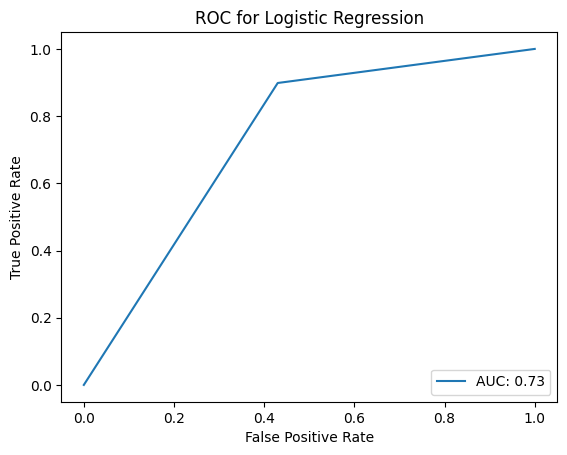

In [17]:
makeROC(m_logReg_yhat_numRep,m_resp_test_numRep, "Logistic Regression")

### Most meaningful predictors for Logistic Regression: ...

The [statsmodel library enables printing of p-values](https://www.geeksforgeeks.org/logistic-regression-using-statsmodels/), similar to the summary function in R.



In [18]:
import statsmodels.api as sm 

# convert the response variable to numeric form to work with statsmodels
m_resp_train_numeric = convertMagic(m_resp_train)

# Here build a logistic regression model using statsmodels library. The y precedes the x syntactically.
sm_log_reg = sm.Logit(m_resp_train_numeric, m_feat_train).fit() 

# The summary function here is similar to the summary function in R, and the p-value is displayed so we can identify the most meaningful predictors.
print(sm_log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.480643
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                14265
Model:                          Logit   Df Residuals:                    14255
Method:                           MLE   Df Model:                            9
Date:                Sun, 26 Nov 2023   Pseudo R-squ.:                  0.2595
Time:                        06:59:19   Log-Likelihood:                -6856.4
converged:                       True   LL-Null:                       -9258.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -1.6594      0.058    -28.821      0.000      -1.772      -1.547
x2            -0.3184      0.

If p < 0.5, the predictor is significant.

In that case, the following predictors are the most meaningful:
- x1: fLength
- x2: fWidth
- x3: fSize
- x5: fConc1
- x7: fM3Long
- x9: fAlpha

In [19]:
# Print the coefficients of each predictor used in magic logistic regression
for i in range(len(magic_cols)):
    print(f"{magic_cols[i]}: {m_logReg.coef_[0][i]}")

# print(magic_cols)
# print(m_logReg.coef_[0])

fLength: 1.2933714949620627
fWidth: 0.061901138003018503
fSize: 0.31464407084774654
fConc: 0.04324452435242772
fConc1: 0.5402294257079686
fAsym: 0.009821155513365367
fM3Long: -0.37925931346758307
fM3Trans: -0.021789340273834192
fAlpha: 1.1956185573603353
fDist: 0.031146636404168176


Larger coefficients do not necessarily indicate more meaningful coefficients, but it appears fLength, fAlpha, fConc1, fM3Long, and fSize have larger coefficients than other predictors. Interestingly, these are also predictors the p-value above deemed significant.


# Linear Discriminant Analysis:

In [20]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
np.random.seed(1)

m_lda = LinearDiscriminantAnalysis().fit(m_feat_train, m_resp_train)
m_lda_yhat = m_lda.predict(m_feat_test)
print(m_lda_yhat)

['g' 'g' 'g' ... 'h' 'g' 'h']


In [21]:
# np.random.seed(1)
# # # Here i made numerical representations for the sake of calculating MSE
# m_lda_yhat_numRep = []
# m_resp_test_numRep = []

# for val in m_lda_yhat:
#     if (val == "g"):
#         m_lda_yhat_numRep.append(1)
#     elif (val == "h"):
#         m_lda_yhat_numRep.append(0)

# for val in m_resp_test:
#     if (val == "g"):
#         m_resp_test_numRep.append(1)
#     elif (val == "h"):
#         m_resp_test_numRep.append(0)

# print(m_lda_yhat_numRep)
# print(m_resp_test_numRep)

# error = mean_squared_error(m_lda_yhat_numRep,m_resp_test_numRep,squared=False)
# print(f"{error} is the MSE of LDA")

In [22]:
m_lda_yhat_numRep, m_resp_test_numRep = findMagicMSE(m_lda_yhat,m_resp_test,"LDA")

0.47481248720110875 is the MSE of LDA


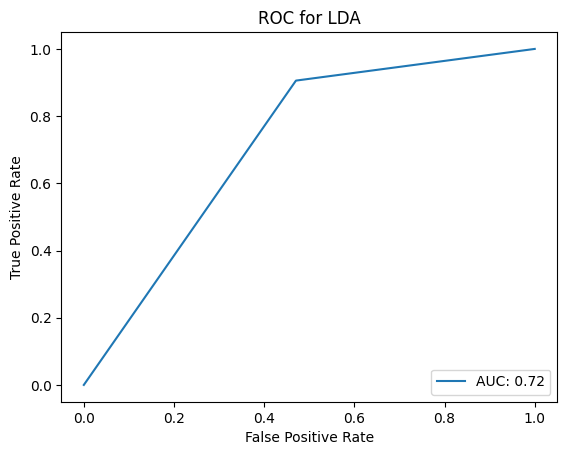

In [23]:
makeROC(m_lda_yhat_numRep,m_resp_test_numRep, "LDA")

# kNN Classifier:

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
np.random.seed(1)

# I decided to explore this range of potential k values, from 1 at minimum to 100 maximum.
m_knn_params = {'n_neighbors' : [1, 3, 5, 10, 15, 20, 25, 50, 75, 100]}

m_knn_clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=m_knn_params)
m_knn_clf.fit(m_feat_train,m_resp_train)

# Here I output the best parameter, best estimator with that parameter, and best score
print(m_knn_clf.best_params_)
print(m_knn_clf.best_estimator_)
# This is the mean cross-validated score of the best estimator
print(m_knn_clf.best_score_)

{'n_neighbors': 15}
KNeighborsClassifier(n_neighbors=15)
0.839397125832457


In [25]:
m_knn_yhat = m_knn_clf.predict(m_feat_test)
print(m_knn_yhat)

['g' 'g' 'g' ... 'g' 'g' 'h']


In [27]:
m_knn_yhat_numeric,m_resp_test_numeric = findMagicMSE(m_knn_yhat,m_resp_test,"kNN")

0.408377055106858 is the MSE of kNN


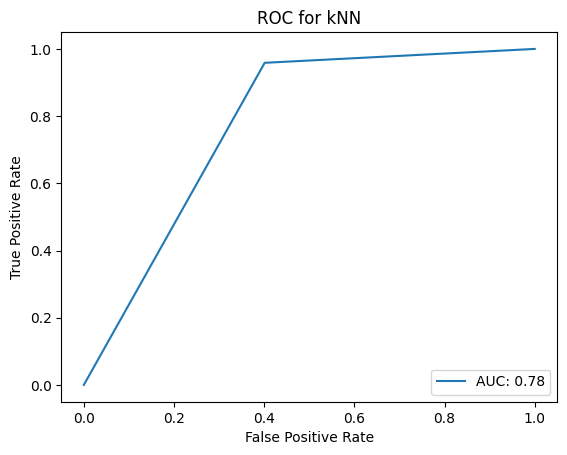

In [28]:
makeROC(m_knn_yhat_numeric,m_resp_test_numeric,"kNN")

# Linear Support Vector Machine:

In [50]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
np.random.seed(1)

# Since linear is the only option for kernel, this will make a linear SVM.
# C's value ranges from 1 to 100. 
# C is the margin penalty and specifies how wide the margin can be, 
# and thus how many mistakes can be made.
# Large values of C = smaller margin
# Small values of C = larger margin
m_linSVM_params = {'kernel' : ['linear'], 'C' : [1, 10, 100]}

m_linSVM_clf = GridSearchCV(estimator=SVC(), param_grid=m_linSVM_params)
m_linSVM_clf.fit(m_feat_train,m_resp_train)

# Here I output the best parameter, best estimator with that parameter, and best score
print(m_linSVM_clf.best_params_)
print(m_linSVM_clf.best_estimator_)
# This is the best mean cross-validated score of the best estimator
print(m_linSVM_clf.best_score_)

{'C': 100, 'kernel': 'linear'}
SVC(C=100, kernel='linear')
0.7948825797406239


In [51]:
m_linSVM_yhat = m_linSVM_clf.predict(m_feat_test)
print(m_linSVM_yhat)

['g' 'g' 'g' ... 'h' 'g' 'h']


In [52]:
m_linSVM_yhat_numeric,m_resp_test_numeric = findMagicMSE(m_linSVM_yhat,m_resp_test,"linear SVM")

0.46654647693660256 is the MSE of linear SVM


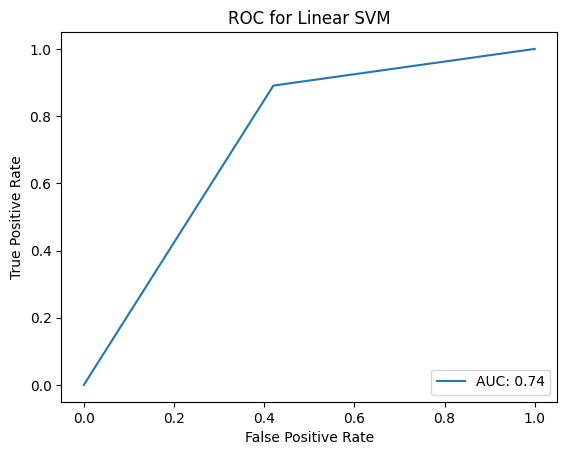

In [53]:
makeROC(m_linSVM_yhat_numeric,m_resp_test_numeric,"Linear SVM")

# Gaussian (Radial) Support Vector Machine

In [43]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
np.random.seed(1)

# Since rbf is the only option for kernel, this will make a Gaussian (radial) SVM.
# rbf stands for radial basis function kernel and is the same as a Gaussian (radial) kernel
# C's value ranges from 1 to 100. 
# gamma's values range from 0.1 to 10
m_gaussSVM_params = {'kernel' : ['rbf'], 'C' : [1,10,100], 'gamma' : [0.1, 1, 10]}

m_gaussSVM_clf = GridSearchCV(estimator=SVC(), param_grid=m_gaussSVM_params)
m_gaussSVM_clf.fit(m_feat_train,m_resp_train)

# Here I output the best parameter, best estimator with that parameter, and best score
print(m_gaussSVM_clf.best_params_)
print(m_gaussSVM_clf.best_estimator_)
# This is the best mean cross-validated score of the best estimator
print(m_gaussSVM_clf.best_score_)

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, gamma=0.1)
0.8745881528215914


In [44]:
m_gaussSVM_yhat = m_gaussSVM_clf.predict(m_feat_test)
print(m_gaussSVM_yhat)

['g' 'g' 'g' ... 'g' 'g' 'h']


In [45]:
m_gaussSVM_yhat_numeric,m_resp_test_numeric = findMagicMSE(m_gaussSVM_yhat,m_resp_test,"Gaussian (radial) SVM")

0.3651483716701107 is the MSE of Gaussian (radial) SVM


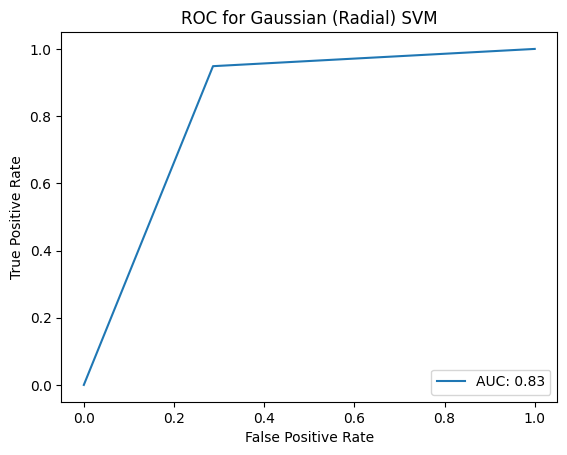

In [47]:
makeROC(m_gaussSVM_yhat_numeric,m_resp_test_numeric,"Gaussian (Radial) SVM")

# Final Summary:

## Forensic Data (IL vs SUB)
## Note: I had permission from Dr. Tang to run default hyperparameters for Gaussian SVM
|Model|MSE|ROC Observation|AUC|Hyperparameter|
|---|---|---|---|---|
|Logistic Regression|0.072|Looks perfectly flush against left and top edge|0.99||
|LDA|0.289|Left edge is flush until 0.85 y-axis, then it slopes upwards|0.92||
|kNN|0.404|Left side ascends up to 0.05 x-axis and 0.75 y-axis, right side ascends the rest of the way|0.84|n_neighbors = 1|
|Linear SVM|0.052|Perfectly flush against left and top edge|1.00|C = 1|
|Gaussian SVM|0.2317|Left edge is flush until 0.9 y-axis, then it slopes upwards|0.95|C = 1, gamma = scale|

Based on the above results, it appears that logistic regression and linear SVM perform the best, with nearly perfect AUCs. Note that the MSE, ROC, and AUC are calculated on the test data, so this testifies to the efficacy of these models!

# MAGIC Data (g vs h)
|Model|MSE|ROC Observation|AUC|Hyperparameter|
|---|---|---|---|---|
|Logistic Regression|0.4647|Left side ascends up to 0.45 x-axis and 0.9 y-axis, right side ascends the rest of the way|0.73|NA|
|LDA|0.4748|Left side ascends up to 0.45 x-axis and 0.9 y-axis, right side ascends the rest of the way|0.72|NA|
|kNN|0.4084|Left side ascends up to 0.4 x-axis and 0.95 y-axis, right side ascends the rest of the way|0.78|n_neighbors = 15|
|Linear SVM|0.4665|Left side ascends up to 0.4 x-axis and 0.9 y-axis, right side ascends the rest of the way|0.74|C = 100|
|Gaussian SVM|0.3651|Left side ascends up to 0.3 x-axis and 0.95 y-axis, right side ascends the rest of the way|0.83|C = 100, gamma = 0.1|